# Task 4.10, Part 1

# 1. Import Libraries and Data

In [1]:
# Import libraries, visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r"C:\Users\miche\Instacart Basket Analysis 2022_MP\02 Data"

In [3]:
# Import departments csv
departments = pd.read_csv(os.path.join(path, 'Prepared Data', 'department_wrangled.csv'))

In [4]:
# Import pkl
merged = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Explore data
merged.shape

(6481355, 30)

In [6]:
merged.head()

,order_id,customer_id,order_number,order_day,order_hour,previous_order,product_id,add_to_cart_order,reordered,product_name,...,median_previous_order,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2550362,1,10,4,8,30.0,12427,9,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,473747,1,3,3,12,21.0,196,1,1,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
merged.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day', 'order_hour',
       'previous_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'department_id', 'prices', 'price_range', 'busy_day',
       'busy_days', 'busy_hours', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_previous_order', 'customer_frequency', 'gender',
       'state', 'age', 'date_joined', 'dependents', 'fam_status', 'income',
       '_merge'],
      dtype='object')

In [8]:
merged['prices'].describe()

count    6.481355e+06
mean     1.216758e+01
std      5.081096e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [9]:
# view items at max price 
max_price = merged[merged['prices'] == 99999.0]

In [10]:
max_price

,order_id,customer_id,order_number,order_day,order_hour,previous_order,product_id,add_to_cart_order,reordered,product_name,...,median_previous_order,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,_merge
147094,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,4.0,Frequent customer,Male,Washington,48,9/8/2019,3,married,536156,both
396272,3295643,119625,6,4,13,21.0,33664,3,0,2 % Reduced Fat Milk,...,21.0,Non-frequent customer,Female,Ohio,43,7/4/2018,3,married,212470,both
1040185,1480351,74750,2,5,17,1.0,33664,24,0,2 % Reduced Fat Milk,...,2.0,Frequent customer,Female,Michigan,49,7/16/2018,2,married,448442,both
1932886,183964,873,3,0,10,7.0,33664,11,0,2 % Reduced Fat Milk,...,10.0,Frequent customer,Male,Colorado,64,2/28/2019,3,married,290220,both
1932887,1851256,873,4,6,12,13.0,33664,8,1,2 % Reduced Fat Milk,...,10.0,Frequent customer,Male,Colorado,64,2/28/2019,3,married,290220,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423218,23724,77427,2,0,16,8.0,33664,6,1,2 % Reduced Fat Milk,...,8.0,Frequent customer,Female,District of Columbia,43,7/20/2018,0,single,289765,both
6427340,2218438,64201,5,2,19,7.0,33664,8,1,2 % Reduced Fat Milk,...,9.0,Frequent customer,Male,Tennessee,63,1/17/2018,1,married,197065,both
6428186,1633376,92034,1,5,10,NaN,33664,4,0,2 % Reduced Fat Milk,...,7.0,Frequent customer,Male,Ohio,40,2/10/2020,0,single,97243,both
6459553,812000,46287,4,6,9,9.0,33664,2,1,2 % Reduced Fat Milk,...,9.0,Frequent customer,Male,Ohio,78,1/27/2018,3,married,209463,both


In [11]:
max_price.shape

(147, 30)

In [12]:
max_price['product_name'].value_counts()

2 % Reduced Fat  Milk    147
Name: product_name, dtype: int64

#### 147 items identified as milk have a price of 99999.0, the price will be changed to NaN since we can be certain that this is not the price of milk.

In [13]:
# Turn outlier prices into NaN values
merged.loc[merged['prices'] >100, 'prices'] = np.nan

In [14]:
merged['prices'].max()

25.0

In [15]:
# Connect department names to department ID
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
# Rename column
departments.rename(columns= {'Unnamed: 0' : 'department_id'}, inplace= True)

In [17]:
# Making df_dept into data dictionary
zip = zip(departments['department_id'], departments['department'])

In [18]:
data_dict= dict(zip)

In [19]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

### Replacing department_id with department name

In [20]:
# Connect department names to department_id
merged['department']= merged['department_id'].map(data_dict)

In [21]:
merged.head()

,order_id,customer_id,order_number,order_day,order_hour,previous_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,_merge,department
0,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks
1,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks
2,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks
3,2550362,1,10,4,8,30.0,12427,9,1,Original Beef Jerky,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,snacks
4,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,beverages


In [22]:
# Department count
merged['department'].value_counts(dropna = False)

produce            1894306
dairy eggs         1080621
snacks              577138
beverages           538356
frozen              447793
pantry              374895
bakery              234619
canned goods        213526
deli                209693
dry goods pasta     173112
household           148095
meat seafood        141704
breakfast           141407
personal care        89254
babies               84400
international        54098
alcohol              30878
pets                 19685
missing              13825
other                 7163
bulk                  6787
Name: department, dtype: int64

# 2. Security Implications:
#### First Name and Surname have been removed (in previous exercise) in order to remove any PII.

# 3. Create a region column:
### Regions Include:
#### Northeast = Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey
#### Midwest = Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
#### South = Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
#### West = Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii

In [23]:
# Create flags 'region' column
result= []

for value in merged['state']:
    if value in('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')

In [24]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 '

In [25]:
# Connect region column with 'result' output
merged['region']=result

In [26]:
# Count regional frequency
merged['region'].value_counts()

South        2159293
West         1658118
Midwest      1518905
Northeast    1145039
Name: region, dtype: int64

### 3a. Determine spending habits amond different regions.

In [27]:
# Create a crosstab to compare region and spending flag
crosstab= pd.crosstab(merged['region'], merged['spender_flag'], dropna=False)

In [28]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,35453,1483452
Northeast,28562,1116477
South,53526,2105767
West,40555,1617563


#### Spending among regions do not differ much. Roughly 2% of each region are considered 'High spender', while the remaining 98% of each region are considered 'Low spender'.

# 4. Create an exclusion flag for low activity customers with less than 5 orders.

In [29]:
# Create exclusion flag
merged.loc[merged['max_order']<5, 'activity']= 'low_activity'
merged.loc[merged['max_order']>=5, 'activity']= 'active'

In [30]:
# Confirm exclusion flag
merged['activity'].value_counts(dropna=False)

active          6166280
low_activity     315075
Name: activity, dtype: int64

In [31]:
# Create active dataset 
merged_active = merged[merged['activity']=='active']

In [32]:
# Create low-activity dataset
merged_low_activity = merged[merged['activity']=='low_activity']

In [33]:
# Export low activity customer df
merged_low_activity.to_pickle(os.path.join(path,'Prepared Data','opc_low_activity.pkl'))

In [33]:
# Delete low-activity df
del merged_low_activity

In [34]:
# Explore active dataset
merged_active.shape

(6166280, 33)

In [35]:
merged_active.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day', 'order_hour',
       'previous_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'department_id', 'prices', 'price_range', 'busy_day',
       'busy_days', 'busy_hours', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_previous_order', 'customer_frequency', 'gender',
       'state', 'age', 'date_joined', 'dependents', 'fam_status', 'income',
       '_merge', 'department', 'region', 'activity'],
      dtype='object')

In [36]:
merged_active.head()

,order_id,customer_id,order_number,order_day,order_hour,previous_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,dependents,fam_status,income,_merge,department,region,activity
0,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,both,snacks,South,active
1,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,snacks,South,active
2,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,snacks,South,active
3,2550362,1,10,4,8,30.0,12427,9,1,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,snacks,South,active
4,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,South,active


In [37]:
vars_list=['order_day','order_hour','previous_order','prices','age','dependents','income']

In [38]:
merged_active[vars_list].describe()

,order_day,order_hour,previous_order,prices,age,dependents,income
count,6.166280e+06,6.166280e+06,5.840570e+06,6.165274e+06,6.166280e+06,6.166280e+06,6.166280e+06
mean,2.741689e+00,1.340955e+01,1.078112e+01,7.789623e+00,4.945112e+01,1.501992e+00,9.967366e+04
std,2.089630e+00,4.249028e+00,8.557240e+00,4.240665e+00,1.848553e+01,1.118826e+00,4.314220e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.000000e+00,1.000000e+01,5.000000e+00,4.200000e+00,3.300000e+01,1.000000e+00,6.731600e+04
50%,3.000000e+00,1.300000e+01,7.000000e+00,7.400000e+00,4.900000e+01,2.000000e+00,9.673700e+04
75%,5.000000e+00,1.600000e+01,1.400000e+01,1.130000e+01,6.500000e+01,3.000000e+00,1.280720e+05
max,6.000000e+00,2.300000e+01,3.000000e+01,2.500000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [39]:
# Compare to main df
merged[vars_list].describe()

,order_day,order_hour,previous_order,prices,age,dependents,income
count,6.481355e+06,6.481355e+06,6.065562e+06,6.480290e+06,6.481355e+06,6.481355e+06,6.481355e+06
mean,2.739231e+00,1.342433e+01,1.110206e+01,7.790443e+00,4.945049e+01,1.502168e+00,9.940574e+04
std,2.090380e+00,4.246312e+00,8.777455e+00,4.241819e+00,1.848479e+01,1.118759e+00,4.305555e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.000000e+00,1.000000e+01,5.000000e+00,4.200000e+00,3.300000e+01,1.000000e+00,6.698400e+04
50%,3.000000e+00,1.300000e+01,8.000000e+00,7.400000e+00,4.900000e+01,2.000000e+00,9.657800e+04
75%,5.000000e+00,1.600000e+01,1.500000e+01,1.130000e+01,6.500000e+01,3.000000e+00,1.278310e+05
max,6.000000e+00,2.300000e+01,3.000000e+01,2.500000e+01,8.100000e+01,3.000000e+00,5.939010e+05


#### Analyst with proceed with merged_active (customer) dataframe.

In [43]:
# Export dataframe with all-activity customers
merged.to_pickle(os.path.join(path, 'Prepared Data', 'opc_AllActivity_410.pkl'))

In [40]:
# Delete larger dataframe to avoid memory errors
del merged

# 5 - 7. Create customer profiles. Aggregate customer profile variables as well as frequency and expenditure. Create visualizations for customer profiles.

## Age Profile

In [41]:
# Create age flag for different age groups 
merged_active.loc[merged_active['age']<=25, 'age_group']= 'Young Adult'
merged_active.loc[(merged_active['age']>25) & (merged_active['age']<65), 'age_group']= "Adult"
merged_active.loc[merged_active['age']>=65, 'age_group']= 'Senior'
merged_active['age_group'].value_counts()

Adult          3764874
Senior         1630686
Young Adult     770720
Name: age_group, dtype: int64

In [42]:
# Aggregate for age group expenditure
merged_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789824  1.0  25.0
Senior       7.790993  1.0  25.0
Young Adult  7.785741  1.0  25.0

In [43]:
# Aggregate for age group order frequency
merged_active.groupby('age_group').agg({'median_previous_order': ['mean', 'min', 'max']})

median_previous_order           
                             mean  min   max
age_group                                   
Adult                    9.966325  0.0  30.0
Senior                   9.923347  0.0  30.0
Young Adult              9.937981  0.0  30.0

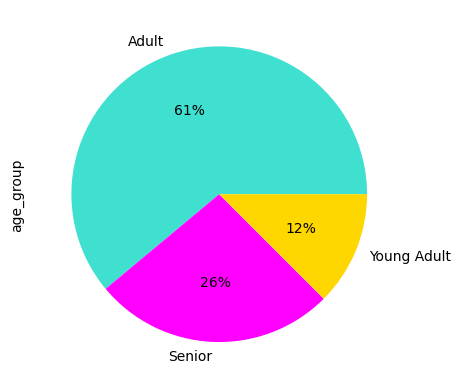

In [44]:
# Age profile visualization
pie_age = merged_active['age_group'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['turquoise','magenta','gold'])

In [49]:
# Export Visualization
pie_age.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\pie_age.png")

## Income Profile

In [45]:
# Create an income-status flag for income groups
merged_active.loc[merged_active['income']<=52000, 'economic_status']= 'Lower Class'
merged_active.loc[(merged_active['income']>52000) & (merged_active['income']<=156000), 'economic_status']= 'Middle Class'
merged_active.loc[merged_active['income']>156000, 'economic_status']= 'Upper Class'
merged_active['economic_status'].value_counts()

Middle Class    4878158
Lower Class      722297
Upper Class      565825
Name: economic_status, dtype: int64

In [46]:
# Aggregate for economic group expenditure
merged_active.groupby('economic_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
economic_status                     
Lower Class      6.758276  1.0  25.0
Middle Class     7.925988  1.0  25.0
Upper Class      7.930779  1.0  25.0

In [47]:
# Aggregate for economic group order frequency
merged_active.groupby('economic_status').agg({'median_previous_order': ['mean', 'min', 'max']})

median_previous_order           
                                 mean  min   max
economic_status                                 
Lower Class                 10.429794  0.0  30.0
Middle Class                 9.901258  0.0  30.0
Upper Class                  9.773183  0.0  30.0

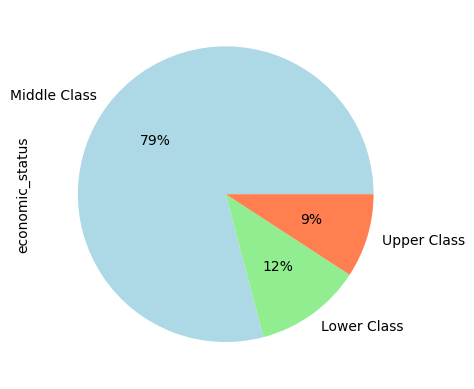

In [48]:
# Create bar chart of expenditure by economic status
pie_income = merged_active['economic_status'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['lightblue','lightgreen','coral'])

In [54]:
# Export Visualization
pie_income.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\pie_income.png")

## Family Dynamic Profile

In [49]:
merged_active['fam_status'].value_counts()

married                             4330122
single                              1014895
divorced/widowed                     525904
living with parents and siblings     295359
Name: fam_status, dtype: int64

In [50]:
# Create family dynamic flag for family status
merged_active.loc[(merged_active['fam_status'] == 'single') & (merged_active['dependents']>=1), 'family_dynamic']= 'Single / Children'
merged_active.loc[(merged_active['fam_status'] == 'divorved/widowed') & (merged_active['dependents']>=1), 'family_dynamic']= 'Single / Children'
merged_active.loc[(merged_active['fam_status'] == 'living with parents and siblings') & (merged_active['dependents']>=1), 'family_dynamic']= 'Single / Children'
merged_active.loc[(merged_active['fam_status'] =='married') & (merged_active['dependents']>=1), 'family_dynamic']= 'Married / Children'
merged_active.loc[(merged_active['fam_status'] == 'single') & (merged_active['dependents']==0), 'family_dynamic']= 'Single / No Children'
merged_active.loc[(merged_active['fam_status'] == 'divorved/widowed') & (merged_active['dependents']==0), 'family_dynamic']= 'Single / No Children'
merged_active.loc[(merged_active['fam_status'] == 'living with parents and siblings') & (merged_active['dependents']==0), 'family_dynamic']= 'Single / No Children'
merged_active.loc[(merged_active['fam_status'] =='married') & (merged_active['dependents']==1), 'family_dynamic']= 'Married / No Children'
merged_active['family_dynamic'].value_counts()

Married / Children       2894770
Married / No Children    1435352
Single / No Children     1014895
Single / Children         295359
Name: family_dynamic, dtype: int64

In [51]:
# Aggregate for family dynamic expenditure
merged_active.groupby('family_dynamic').agg({'prices': ['mean', 'min', 'max']})

prices           
                           mean  min   max
family_dynamic                            
Married / Children     7.788294  1.0  25.0
Married / No Children  7.792552  1.0  25.0
Single / Children      7.797297  1.0  25.0
Single / No Children   7.783499  1.0  25.0

In [52]:
# Aggregate for family dynamic order frequency
merged_active.groupby('family_dynamic').agg({'median_previous_order': ['mean', 'min', 'max']})

median_previous_order           
                                       mean  min   max
family_dynamic                                        
Married / Children                 9.965020  0.0  30.0
Married / No Children              9.956919  0.0  30.0
Single / Children                  9.874289  0.0  30.0
Single / No Children               9.968617  0.0  30.0

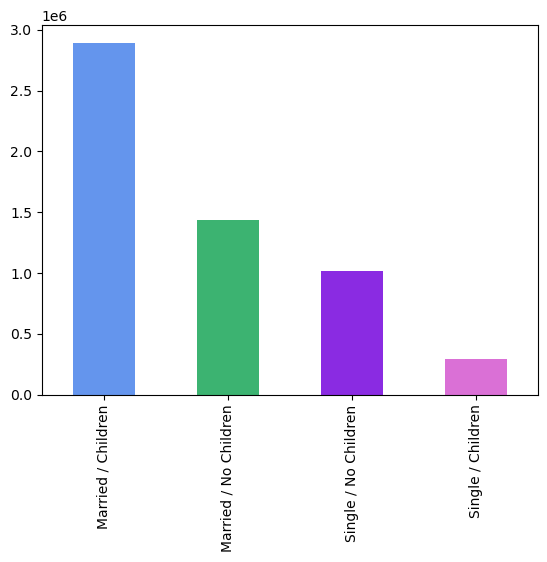

In [53]:
# Create bar chart of family dynamic
bar_family_dynamic = merged_active['family_dynamic'].value_counts().plot.bar(color =['cornflowerblue', 'mediumseagreen', 'blueviolet','orchid'])

In [60]:
# Export Visualization
bar_family_dynamic.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_family_dynamic.png")

# 8 Compare customer profiles with regions and departments. Show relationships in through visualizations.

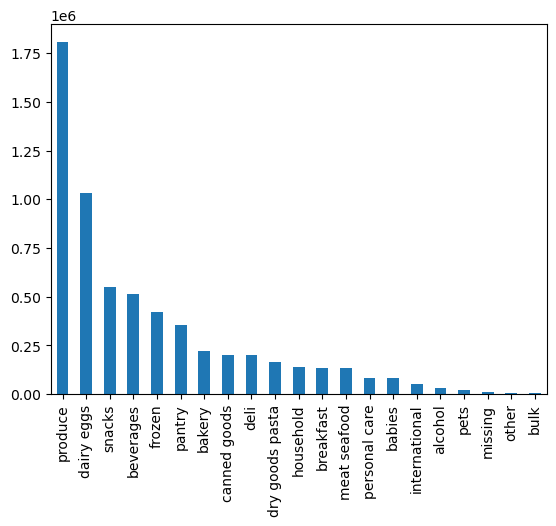

In [54]:
# Plot department purchases distribution
bar_departments = merged_active['department'].value_counts().plot.bar()

## Department Spend by Region

In [55]:
# Plot department spend by region
crosstab_dr = pd.crosstab(merged_active['region'], merged_active['department'], dropna = False)

In [56]:
crosstab_dr

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,6791,18790,52245,119007,31191,1566,47491,241618,46837,38582,...,33330,12066,31376,3086,1633,83277,19728,4281,424365,128765
Northeast,5034,14492,39556,92727,23634,1110,35219,182537,35391,28472,...,24766,8920,23613,2297,1218,62275,14964,3562,316588,98001
South,9616,27790,74211,171342,44686,2179,66955,343856,66244,54162,...,45807,16982,44658,4366,2256,117761,28304,6053,603516,182124
West,7266,20474,57260,129185,34739,1666,51799,264575,50991,42138,...,35463,13292,34572,3167,1668,91168,21116,4811,462603,141739


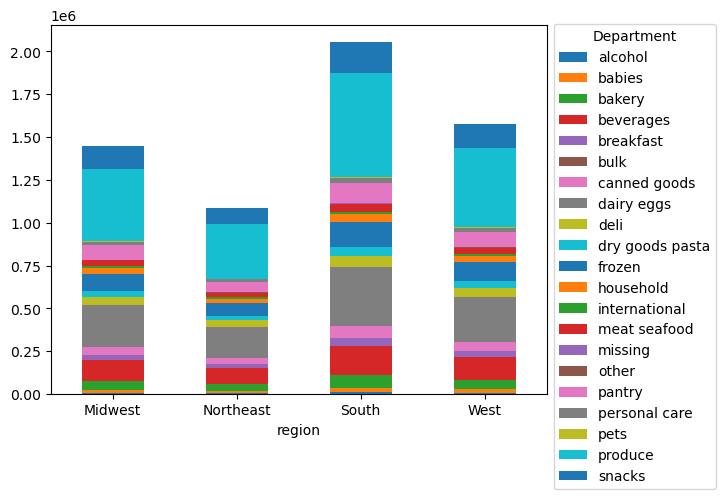

In [64]:
# Create a bar chart
bar_dept_region = crosstab_dr.plot(kind='bar',stacked=True, rot=0)
bar_dept_region.legend(title='Department', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [65]:
# Export Visualization
bar_dept_region.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_department_region.png")

## Age Group by Region

In [66]:
# Plot age_group by region
crosstab_ar = pd.crosstab(merged_active['region'], merged_active['age_group'], dropna = False)

In [67]:
crosstab_ar

age_group,Adult,Senior,Young Adult
region,,,
Midwest,887339,379016,178935
Northeast,656913,295775,135738
South,1253015,539078,262083
West,967607,416817,193964


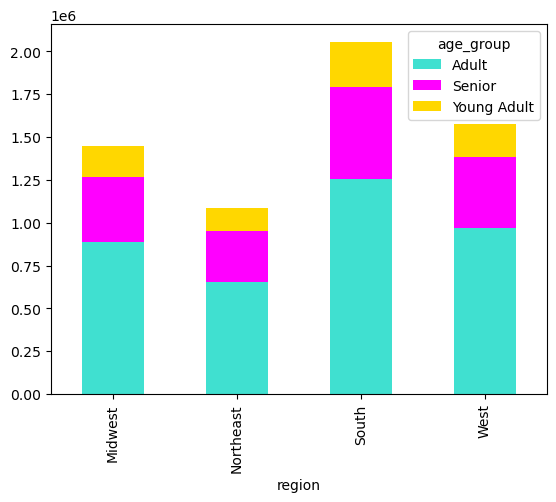

In [68]:
bar_age_region = crosstab_ar.plot(kind='bar', stacked=True, color=['turquoise','magenta','gold'])

In [69]:
# Export Visualization
bar_age_region.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_age_region.png")

## Income Status by Region

In [70]:
# Plot income by region
crosstab_ir = pd.crosstab(merged_active['region'], merged_active['economic_status'], dropna = False)

In [71]:
crosstab_ir

economic_status,Lower Class,Middle Class,Upper Class
region,,,
Midwest,169682,1143145,132463
Northeast,126850,864102,97474
South,245203,1618121,190852
West,180562,1252790,145036


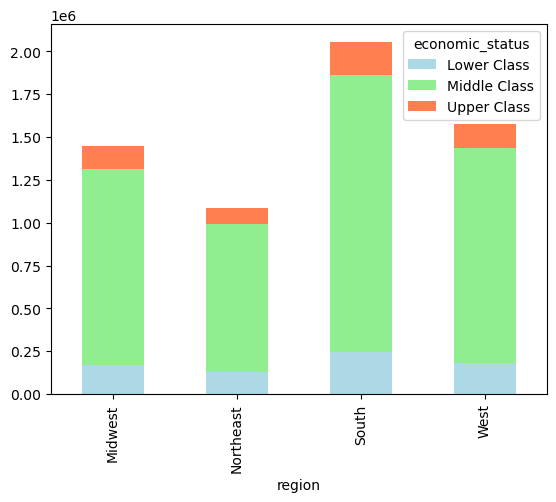

In [72]:
bar_income_region = crosstab_ir.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'coral'])

In [73]:
# Export Visualization
bar_income_region.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_income_region.png")

## Family Dynamic by Region

In [76]:
# Plot income by region
crosstab_fd = pd.crosstab(merged_active['region'], merged_active['family_dynamic'], dropna = False)

In [77]:
crosstab_fd

family_dynamic,Married / Children,Married / No Children,Single / Children,Single / No Children
region,,,,
Midwest,670344,342240,70017,239914
Northeast,510790,256738,51011,174319
South,967513,471480,100968,339369
West,746123,364894,73363,261293


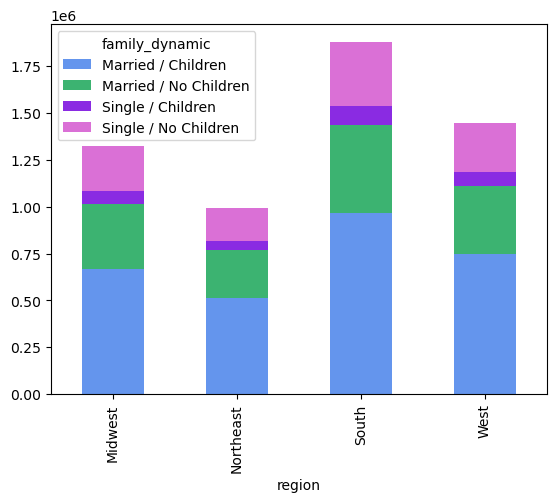

In [78]:
bar_famdynam_region = crosstab_fd.plot(kind='bar', stacked=True, color=['cornflowerblue', 'mediumseagreen', 'blueviolet','orchid'])

In [79]:
# Export Visualization
bar_famdynam_region.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_family_region.png")

## Department Spend by Age Group

In [57]:
# Remove departments 'missing' and 'other' from df since the information is not helpful in analysis
dept_slim=merged_active[(merged_active.department !='missing' ) & (merged_active.department != 'other')]

In [58]:
dept_slim['department'].value_counts()

produce            1807072
dairy eggs         1032586
snacks              550629
beverages           512261
frozen              423319
pantry              354481
bakery              223272
canned goods        201464
deli                199463
dry goods pasta     163354
household           139366
breakfast           134250
meat seafood        134219
personal care        84112
babies               81546
international        51260
alcohol              28707
pets                 18707
bulk                  6521
Name: department, dtype: int64

In [91]:
# Plot department spend by age group
crosstab_dage = pd.crosstab(dept_slim['age_group'], dept_slim['department'], dropna = False)

In [92]:
crosstab_dage

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,
Adult,17655,50279,136494,312889,82329,3963,122834,630365,121785,99396,258133,84939,31147,81561,216482,51550,11103,1102663,337274
Senior,7220,21162,58777,136009,34929,1764,53331,272739,52915,43227,112426,37217,13503,35753,93557,21966,5009,479498,144545
Young Adult,3832,10105,28001,63363,16992,794,25299,129482,24763,20731,52760,17210,6610,16905,44442,10596,2595,224911,68810


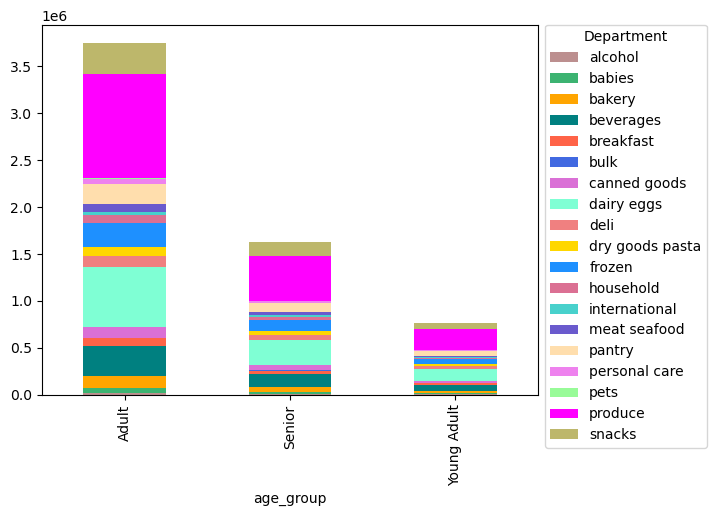

In [101]:
# Create a bar chart
bar_dept_age = crosstab_dage.plot(kind='bar',stacked=True, color=['rosybrown','mediumseagreen','orange','teal','tomato','royalblue','orchid','aquamarine','lightcoral','gold','dodgerblue','palevioletred','mediumturquoise','slateblue','navajowhite','violet','palegreen','magenta','darkkhaki'])
bar_dept_age.legend(title='Department', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [102]:
# Export Visualization
bar_dept_age.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_age_spend_dept.png")

## Department Spend by Income Status

In [59]:
# Plot department spend by age group
crosstab_di = pd.crosstab(dept_slim['economic_status'], dept_slim['department'], dropna = False)

In [60]:
crosstab_di

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks
economic_status,,,,,,,,,,,,,,,,,,,
Lower Class,3821,6538,23109,81141,19683,985,17099,108948,22610,14231,46495,18408,4709,7681,35947,10049,1849,179034,117766
Middle Class,21053,67218,178227,385102,102468,5027,165135,827923,158480,133577,336328,107200,41695,113369,284859,66226,14850,1465320,388490
Upper Class,3833,7790,21936,46018,12099,509,19230,95715,18373,15546,40496,13758,4856,13169,33675,7837,2008,162718,44373


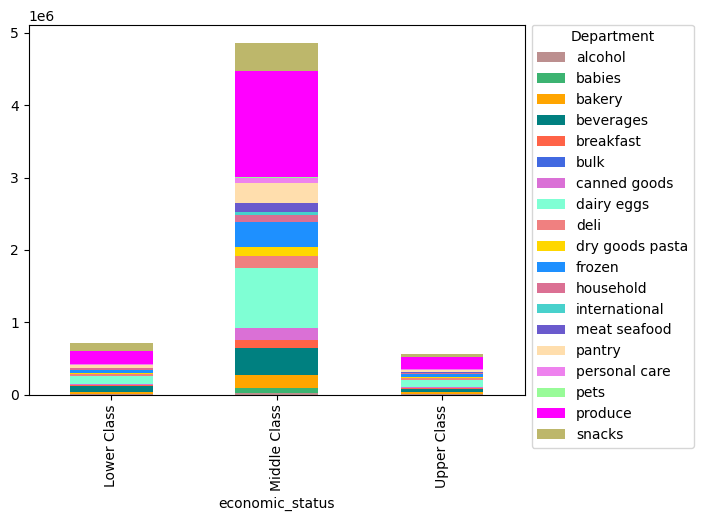

In [61]:
# Create a bar chart
bar_dept_income = crosstab_di.plot(kind='bar',stacked=True, color=['rosybrown','mediumseagreen','orange','teal','tomato','royalblue','orchid','aquamarine','lightcoral','gold','dodgerblue','palevioletred','mediumturquoise','slateblue','navajowhite','violet','palegreen','magenta','darkkhaki'])
bar_dept_income.legend(title='Department', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [62]:
# Export Visualization
bar_dept_income.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_dept_spend_income.png")

## Department Spend by Family Dynamic

In [63]:
# Plot department spend by family dynamic
crosstab_dfd = pd.crosstab(dept_slim['family_dynamic'], dept_slim['department'], dropna = False)

In [64]:
crosstab_dfd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks
family_dynamic,,,,,,,,,,,,,,,,,,,
Married / Children,13230,38809,104369,240783,62886,3055,94839,483135,93468,76897,199468,65889,23739,63293,166256,39421,8563,848621,258908
Married / No Children,6565,18340,51985,119092,31366,1631,46889,241442,46272,38112,97863,32928,11915,31483,82946,19534,4331,419511,128596
Single / Children,1592,3911,10746,23757,6663,299,9683,50087,9515,7970,20331,6533,2493,6407,17102,4001,1146,86134,25983
Single / No Children,5017,13694,37055,84690,22009,1013,33293,169908,32948,26467,68887,22410,8739,21544,58104,13835,3105,298386,90372


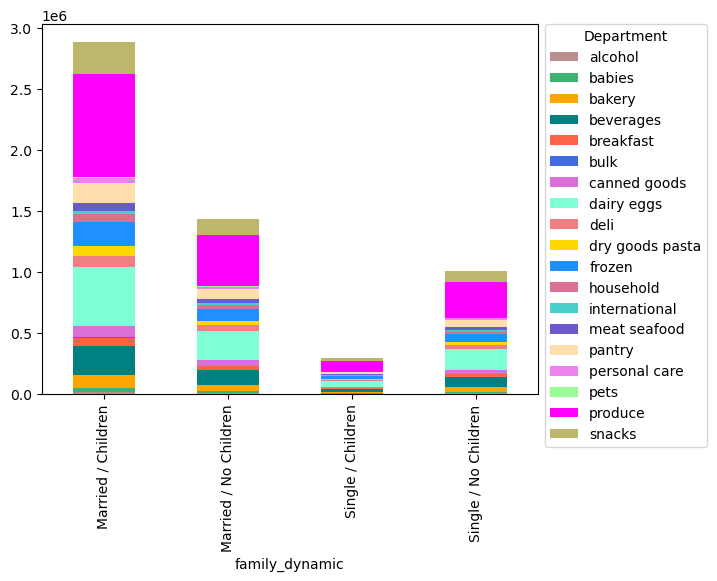

In [65]:
# Create a bar chart
bar_dept_dynamic = crosstab_dfd.plot(kind='bar',stacked=True, color=['rosybrown','mediumseagreen','orange','teal','tomato','royalblue','orchid','aquamarine','lightcoral','gold','dodgerblue','palevioletred','mediumturquoise','slateblue','navajowhite','violet','palegreen','magenta','darkkhaki'])
bar_dept_dynamic.legend(title='Department', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [66]:
# Export Visualization
bar_dept_dynamic.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_dept_spend_famdynam.png")

# Buying Habits Analysis

#### Do people with children purchase more items from 'babies' department compared to those without children?

In [117]:
# Create babies df
babies = merged_active.loc[merged_active['department']=='babies']

In [118]:
# Plot baby department spend by family dynamic
crosstab_babies = pd.crosstab(babies['family_dynamic'], babies['department'], dropna = False)

In [119]:
crosstab_babies

department,babies
family_dynamic,
Married / Children,38809
Married / No Children,18340
Single / Children,3911
Single / No Children,13694


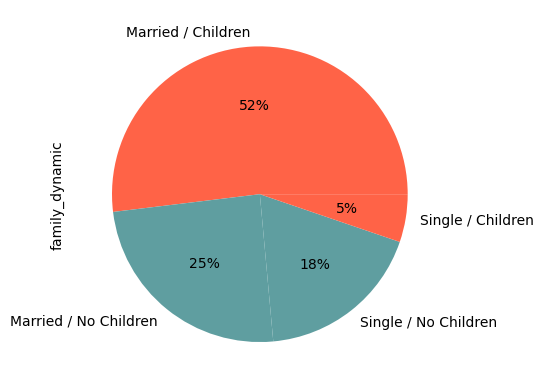

In [122]:
# Create bar chart of babies spend by family dynamic
pie_babies = babies['family_dynamic'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['tomato','cadetblue','cadetblue','tomato'])

### Do sigle people purchase more pet items than married people?

In [123]:
# Create pets df
pets = merged_active.loc[merged_active['department']=='pets']

In [124]:
# Plot pet department spend by family dynamic
crosstab_pets = pd.crosstab(pets['family_dynamic'], pets['department'], dropna = False)

In [126]:
crosstab_pets

department,pets
family_dynamic,
Married / Children,8563
Married / No Children,4331
Single / Children,1146
Single / No Children,3105


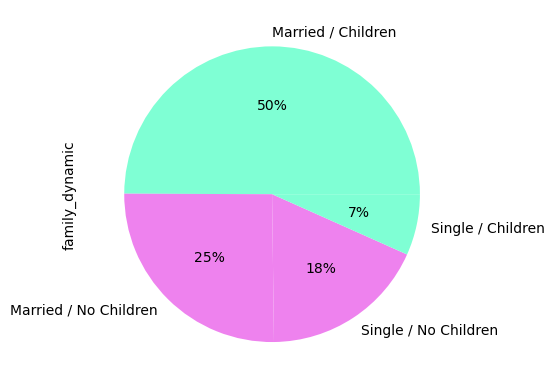

In [125]:
# Create bar chart of pet spend by family dynamics
pie_pets = pets['family_dynamic'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['aquamarine','violet','violet','aquamarine'])

### Do males or females buy more alcohol?

In [127]:
# Create alcohol dataframe
alcohol = merged_active.loc[merged_active['department']=='alcohol']

In [128]:
# Plot alcohol spend by gender
crosstab_alcohol = pd.crosstab(alcohol['gender'], alcohol['department'], dropna = False)

In [129]:
crosstab_alcohol

department,alcohol
gender,
Female,14829
Male,13878


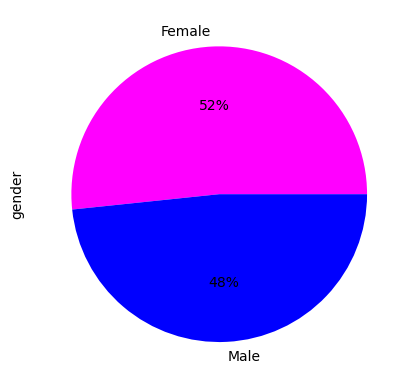

In [131]:
# Create bar chart of alcohol spend by gender
pie_alcohol = alcohol['gender'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['magenta','blue'])

### Do males or females spend more on produce?

In [132]:
# Create alcohol dataframe
produce = merged_active.loc[merged_active['department']=='produce']

In [133]:
# Plot produce spend by gender
crosstab_produce = pd.crosstab(produce['gender'], produce['department'], dropna = False)

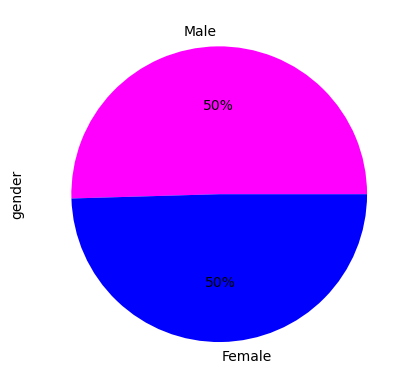

In [134]:
# Create bar chart of alcohol spend by gender
pie_produce = produce['gender'].value_counts().plot.pie(autopct=('%1.f%%'), colors = ['magenta','blue'])

## What hour of the day do customers spend the most money?

In [149]:
# Plot hourly spend
hourly_spend=merged_active[['order_hour','prices']]

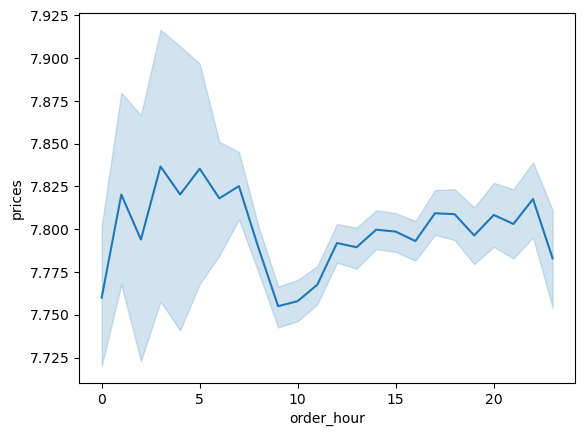

In [151]:
# Create a line chart
line_hourly_spend = sns.lineplot(data = hourly_spend, x = 'order_hour',y = 'prices')

In [152]:
# Export Visualization
line_hourly_spend.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\line_hourly_spend.png")

### Are spending habits different across regions?

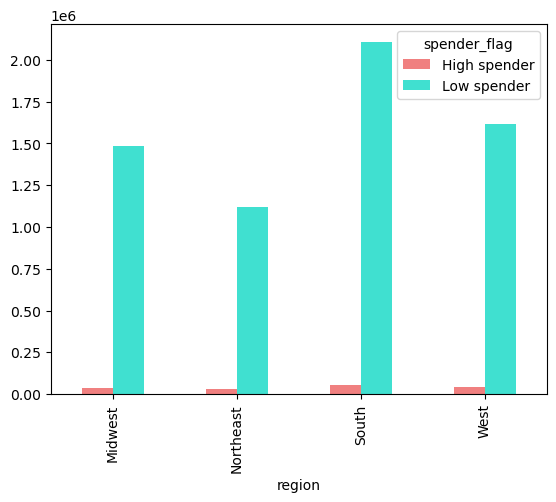

In [153]:
bar_spend_region = crosstab.plot(kind='bar', color=['lightcoral', 'turquoise'])

In [154]:
# Export Visualization
bar_spend_region.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_spend_region.png")

In [145]:
# Export Final Dataframe
# Export data to pkl
merged_active.to_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers_active_final.pkl'))

In [155]:
merged_active.shape

(6166280, 36)

In [156]:
merged_active.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day', 'order_hour',
       'previous_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'department_id', 'prices', 'price_range', 'busy_day',
       'busy_days', 'busy_hours', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_previous_order', 'customer_frequency', 'gender',
       'state', 'age', 'date_joined', 'dependents', 'fam_status', 'income',
       '_merge', 'department', 'region', 'activity', 'age_group',
       'economic_status', 'family_dynamic'],
      dtype='object')